In [2]:
#!/usr/bin/env python
#title           :testClassifier.py
#description     :Test classifier and plot performance evaluation.
#author          :siyu zhu
#date            :March 17, 2014
#version         :0.1
#usage           :python testClassifier.py
#notes           :
#python_version  :2.7

# import modules
import pickle
import numpy
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing

# define threshold Scaling 
def threScale(t):
    # make threshold plotable by making its value from 0 ~ 1 and length equal to precision and recall vector
    t = numpy.append(t, t[-1])
    t = t - numpy.min(t)
    t = t / numpy.max(t)
    return t

# define F metric 
def fmetric(pre, rec):
    # compute f1 metric from precision and recall vector;
    f = 2*pre*rec/(pre+rec)
    return f
  
def error_curve(test_score):
    '''error in each iteration, (AdaBoost only)
    
    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = plt.plot(test_score)
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title(r'Testing curve')
    ax.legend(loc = 1)
    plt.savefig('error.png')
    plt.savefig('error.pdf')
    return
    
def roc_curve(fpr_te, tpr_te):
    ''' ROC curve

    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = plt.plot(fpr_te, tpr_te)
    plt.grid(True)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(r'ROC')
    ax.legend(loc = 1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.savefig('roc.png')
    plt.savefig('roc.pdf')
    return

def prf_curve(pre_te, rec_te, thre_te):
    ''' compute the precision, recall and f measure
    
    '''
    f1 = fmetric(pre_te, rec_te)
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.plot(thre_te, pre_te, label = 'precision')
    plt.plot(thre_te, rec_te, label = 'recall')
    plt.plot(thre_te, f1, label = 'f metric')
    plt.grid(True)
    plt.xlabel('Threshold')
    plt.ylabel('Metric Value')
    plt.title(r'Recall, Precision and F1-score')
    ax.legend(loc = 1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    print 'Maximum F1:', max(f1)
    print 'at Preicision:', pre_te[numpy.argmax(f1)]
    print 'at Recall:', rec_te[numpy.argmax(f1)]
    plt.savefig('prf.png')
    plt.savefig('prf.pdf')
    return

def pr_curve(pre_te, rec_te):
    ''' Precision/Recall curve
    
    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    p1 = plt.plot(rec_te, pre_te)
    plt.grid(True)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title(r'Precision/Recall')
    ax.legend(loc = 1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.savefig('pr.png')
    plt.savefig('pr.pdf')
    return

In [3]:
def test(argv):
    
    default_data = 'icdar2003word'
    default_clf = 'adaboost'
    
    if len(argv) == 1:
        dataset = default_data 
        mode = default_clf
    elif len(argv) == 2:
        dataset = argv[1]
        mode = default_clf
    elif len(argv) == 3:
        dataset = argv[1]
        mode = argv[2]
    else:
        raise Exception('input argument: dataset_name classifier_name')
    print 'dataset:', dataset
    print 'mode:', mode
    
    # load classifier and dataset
    clfdir = '../clf/'
    clfname = clfdir + dataset + mode
    print clfname
    c = pickle.load(open(clfname))

    if mode == 'vjcascade':
        pred = c.predict(ft_te)        
        print 'Preicision:', metrics.precision_score(lb_te, pred)
        print 'Recall:', metrics.recall_score(lb_te, pred)
        print 'F1:', metrics.f1_score(lb_te, pred)
        return

    if mode == 'adaboost':
        test_score = []
        for i, pred in enumerate(c.staged_decision_function(ft_te)):
            test_score.append(c.loss_(lb_te, pred))
        error_curve(test_score)
    
    # Apply classifier and generate prediction labels with probability
    pred_te = c.decision_function(ft_te)
    fpr_te, tpr_te, t = metrics.roc_curve(lb_te, pred_te, pos_label = 1)
    pre_te, rec_te, thre_te = metrics.precision_recall_curve(lb_te, pred_te, pos_label=1)
    thre_te = threScale(thre_te)
    
    roc_curve(fpr_te, tpr_te)
    prf_curve(pre_te, rec_te, thre_te)
    pr_curve(pre_te, rec_te)
    
if __name__ == '__main__':
    test(['', 'icdar2003word', 'adaboost'])

dataset: icdar2003word
mode: adaboost
../clf/icdar2003wordadaboost


IOError: [Errno 2] No such file or directory: '../clf/icdar2003wordadaboost'

In [4]:
# Apply classifier and generate prediction labels with probability
# load data
lb = numpy.load('labe.npy')
pred = numpy.load('pred.npy')
trscore = numpy.load('trcurve.npy')

# compute 
fpr, tpr, t = metrics.roc_curve(lb, pred, pos_label = 1)
pre, rec, thre = metrics.precision_recall_curve(lb, pred, pos_label=1)
thre = threScale(thre)

roc_curve(fpr, tpr)
prf_curve(pre, rec, thre)
pr_curve(pre, rec)
error_curve(trscore)

IOError: [Errno 2] No such file or directory: 'labe.npy'

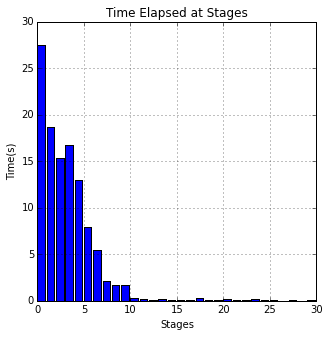

In [9]:
%matplotlib inline
x = [27.5, 18.7, 15.4, 16.8, 13.0, 7.9, 5.5, 2.1, 
    1.7, 1.7, 0.3, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 
    0.3, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 
    0.0, 0.1, 0.0, 0.1]
y = range(len(x))

fig, ax = plt.subplots(figsize=(5, 5))
p1 = plt.bar(y, x)
plt.grid(True)
plt.xlabel('Stages')
plt.ylabel('Time(s)')
plt.title(r'Time Elapsed at Stages')

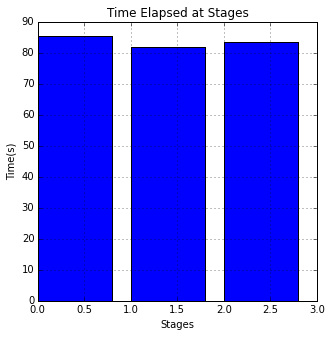

In [16]:



fig, ax = plt.subplots(figsize=(5, 5))
p1 = plt.bar(y, x)
plt.grid(True)
plt.xlabel('Stages')
plt.ylabel('Time(s)')
plt.title(r'Time Elapsed at Stages')

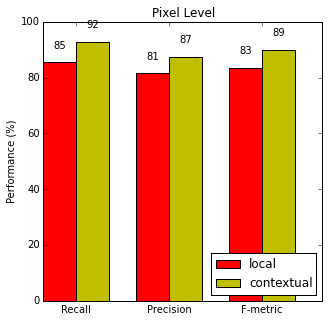

In [29]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [85.57 , 81.73 , 83.61]
perf2 = [92.71, 87.33, 89.94]
label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Pixel Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('local', 'contextual'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

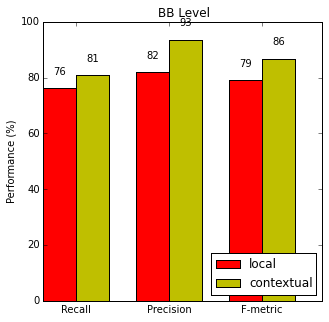

In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [76.44 , 82.04 , 79.14]
perf2 = [81.02 , 93.39 , 86.77]
label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('local', 'contextual'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

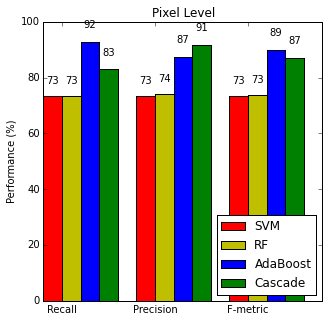

In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [73.32 , 73.54 , 73.43]
perf2 = [73.47 , 74.11 , 73.79]
perf3 = [92.71 , 87.33 , 89.94]
perf4 = [83.01 , 91.67 , 87.13]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Pixel Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('SVM', 'RF', 'AdaBoost', 'Cascade'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

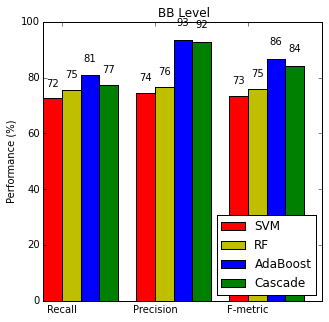

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [72.55 , 74.36 , 73.44]
perf2 = [75.43 , 76.49 , 75.96]
perf3 = [81.02 , 93.39 , 86.77]
perf4 = [77.27 , 92.63 , 84.26]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, colaor='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('SVM', 'RF', 'AdaBoost', 'Cascade'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

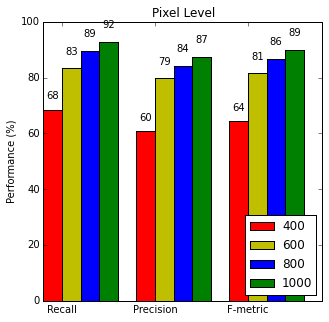

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [68.22 , 60.78 , 64.29]
perf2 = [83.32 , 79.96 , 81.61]
perf3 = [89.40 , 84.27 , 86.76]
perf4 = [92.71 , 87.33 , 89.94]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Pixel Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('400', '600', '800', '1000'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

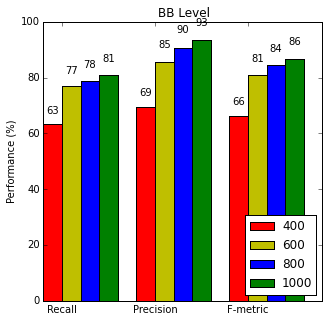

In [41]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [63.23 , 69.30 , 66.13]
perf2 = [77.02 , 85.64 , 81.10]
perf3 = [78.93 , 90.73 , 84.42]
perf4 = [81.02 , 93.39 , 86.77]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('400', '600', '800', '1000'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

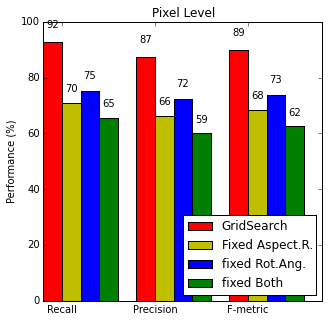

In [44]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [92.71 , 87.33 , 89.94]
perf2 = [70.73 , 66.32 , 68.45]
perf3 = [75.27 , 72.39 , 73.80]
perf4 = [65.44 , 59.98 , 62.59]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Pixel Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('GridSearch', 'Fixed Aspect.R.', 'fixed Rot.Ang.', 'fixed Both'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

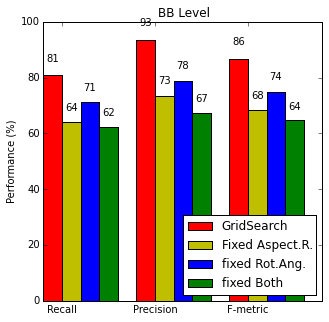

In [45]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [81.02 , 93.39 , 86.77]
perf2 = [64.18 , 73.44 , 68.50]
perf3 = [71.21 , 78.75 , 74.79]
perf4 = [62.41 , 67.20 , 64.72]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('GridSearch', 'Fixed Aspect.R.', 'fixed Rot.Ang.', 'fixed Both'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

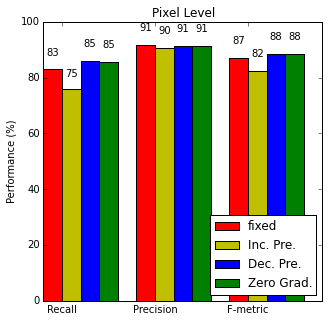

In [49]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [83.01 , 91.67 , 87.13]
perf2 = [75.76 , 90.64 , 82.53]
perf3 = [85.92 , 91.17 , 88.47]
perf4 = [85.59 , 91.35 , 88.38]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Pixel Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('fixed', 'Inc. Pre.', 'Dec. Pre.', 'Zero Grad.'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

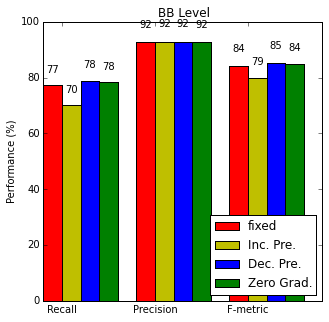

In [50]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [77.27 , 92.63 , 84.26]
perf2 = [70.25 , 92.84 , 79.98]
perf3 = [78.84 , 92.78 , 85.24]
perf4 = [78.34 , 92.61 , 84.88]

label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('fixed', 'Inc. Pre.', 'Dec. Pre.', 'Zero Grad.'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

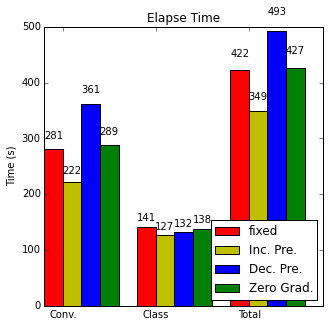

In [52]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
perf1 = [281 , 141 , 422]
perf2 = [222 , 127 , 349]
perf3 = [361 , 132 , 493]
perf4 = [289 , 138 , 427]

label = ['Conv.', 'Class', 'Total']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Time (s)')
ax.set_title('Elapse Time')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('fixed', 'Inc. Pre.', 'Dec. Pre.', 'Zero Grad.'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

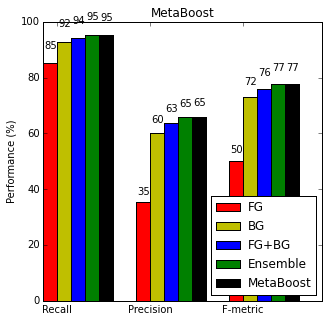

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [85.3 , 35.4 , 50.03]
perf2 = [92.9 , 60.1 , 72.98]
perf3 = [94.1 , 63.8 , 76.04]
perf4 = [95.2 , 65.7 , 77.75]
perf5 = [95.1 , 65.9 , 77.85]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')
rects5 = ax.bar(ind + width*4, perf5, width, color='k')


# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('MetaBoost')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('FG', 'BG', 'FG+BG', 'Ensemble', 'MetaBoost'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


plt.show()

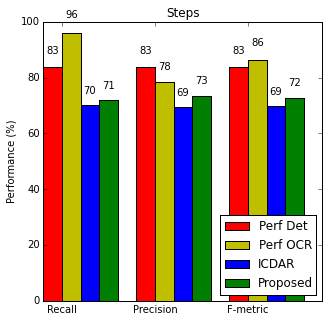

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [83.72, 83.72, 83.72]
perf2 = [96.12, 78.26, 86.28]
perf3 = [70.10, 69.33, 69.71]
perf4 = [71.91, 73.55, 72.72]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')


# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('Steps')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('Perf Det', 'Perf OCR', 'ICDAR', 'Proposed'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

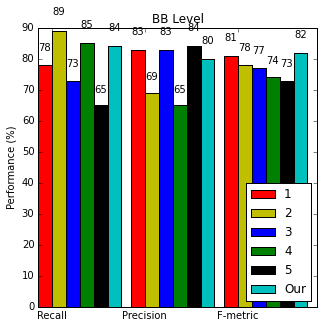

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [78, 83, 81]
perf2 = [89, 69, 78]
perf3 = [73, 83, 77]
perf4 = [85, 65, 74]
perf5 = [65, 84, 73]
perf6 = [84, 80, 82]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')
rects5 = ax.bar(ind + width*4, perf5, width, color='k')
rects6 = ax.bar(ind + width*5, perf6, width, color='c')




# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('1', '2', '3', '4', '5', 'Our'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

plt.show()

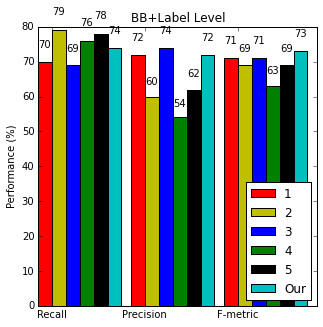

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [70, 72, 71]
perf2 = [79, 60, 69]
perf3 = [69, 74, 71]
perf4 = [76, 54, 63]
perf5 = [78, 62, 69]
perf6 = [74, 72, 73]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='g')
rects5 = ax.bar(ind + width*4, perf5, width, color='k')
rects6 = ax.bar(ind + width*5, perf6, width, color='c')




# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
ax.set_title('BB+Label Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('1', '2', '3', '4', '5', 'Our'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

plt.show()

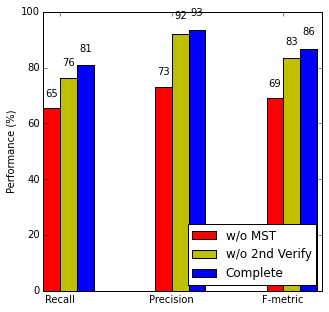

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [65.45, 73.21, 69.11]
perf2 = [76.22, 92.13, 83.42]
perf3 = [81.02, 93.39, 86.77]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('BB+Label Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('w/o MST', 'w/o 2nd Verify', 'Complete'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

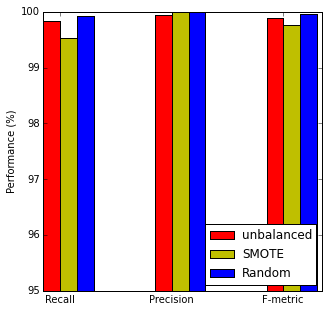

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [99.84, 99.94, 99.89]
perf2 = [99.53, 100, 99.76]
perf3 = [99.92, 100, 99.96]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
plt.ylim((95, 100))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('BB+Label Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('unbalanced', 'SMOTE', 'Random'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)



plt.show()

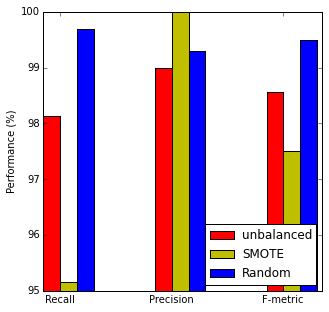

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [98.14, 99.00, 98.57]
perf2 = [95.15, 100, 97.51]
perf3 = [99.70, 99.29, 99.49]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
plt.ylim((95, 100))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('BB+Label Level')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('unbalanced', 'SMOTE', 'Random'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)



plt.show()

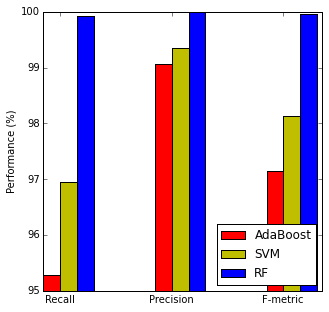

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [95.29, 99.07, 97.15]
perf2 = [96.95, 99.35, 98.13]
perf3 = [99.92, 100, 99.96]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
plt.ylim((95, 100))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('AdaBoost', 'SVM', 'RF'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)



plt.show()

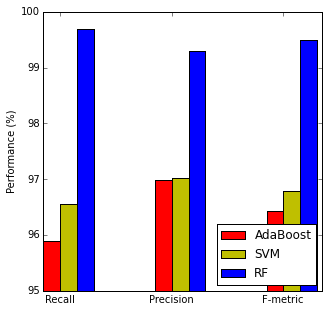

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [95.89, 96.98, 96.43]
perf2 = [96.56, 97.03, 96.79]
perf3 = [99.70, 99.29, 99.49]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))
plt.ylim((95, 100))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('AdaBoost', 'SVM', 'RF'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)



plt.show()

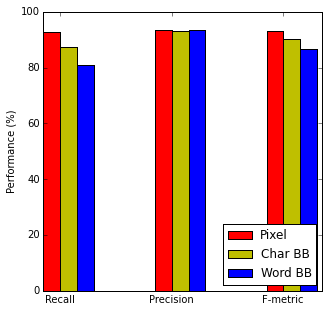

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3
perf1 = [92.75, 93.53, 93.14]
perf2 = [87.51, 93.20, 90.26]
perf3 = [81.02, 93.39, 86.77]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('Pixel', 'Char BB', 'Word BB'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)



plt.show()

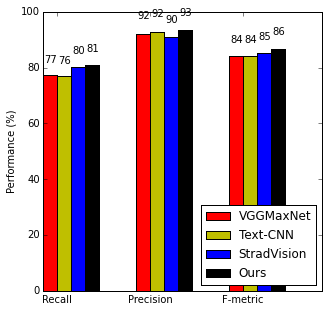

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 3


perf1 = [77.32, 92.18, 84.10]
perf2 = [76.95, 92.78, 84.13]
perf3 = [80.15, 90.93, 85.20]
perf4 = [81.02, 93.39, 86.77]


label = ['Recall', 'Precision', 'F-metric']
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(5, 5))


rects1 = ax.bar(ind, perf1, width, color='r')
rects2 = ax.bar(ind + width, perf2, width, color='y')
rects3 = ax.bar(ind + width*2, perf3, width, color='b')
rects4 = ax.bar(ind + width*3, perf4, width, color='k')

# add some text for labels, title and axes ticks
ax.set_ylabel('Performance (%)')
#ax.set_title('')
ax.set_xticks(ind + width)
ax.set_xticklabels(label)

ax.legend(('VGGMaxNet', 'Text-CNN', 'StradVision', 'Ours'), loc = 4)


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()